# Clustering Based Algorithm

The clustering based algorithm sorts its colours in groups however does not sort the colours within each cluster. This algorithm first chooses random centroids from the list of available colours. A centroid is a position which is used to cluster colours. The program then finds the centroid that each colour is closest to, and then assigns that colour to the cluster. Afterwrads this process is then looped by generating a new centroid from each cluster to help assign colours to the correct cluster.

### Read File

Method reads the text file that was parsed.

In [1]:
import numpy as np      # Numerical library, used keeing the list of colours and computing the Euclidean distance

# Read in the color data file 
# Input: string with file name
# Oputput: the number of colours (integer), and a list numpy arrays with all the colours
def read_data(fname):
    cols = np.loadtxt(fname, skiprows = 4) # The first 4 lines have text information, and are ignored     
    ncols = len(cols)     # Total number of colours and list of colours
    return ncols,cols

### Create Colour Strip

Method plots the colours from the provided array in a strip. The colours are ordered through the order list that is parsed.

In [2]:
import matplotlib.pyplot as plt

# Display the colors as a strip of color bars
# Input: list of colors, order of colors, and height/ratio

def plot_colours(col_list, col_order, ratio = 10): 
    assert len(col_list) == len(col_order)
    img = np.zeros((ratio, len(col_list), 3))
    for i in range(0, len(col_list)):
        img[:, i, :] = col_list[col_order[i]]
    fig, axes = plt.subplots(1, figsize=(10,6)) # figsize=(width,height) handles window dimensions
    axes.imshow(img, interpolation='nearest')
    axes.axis('off')
    plt.show()

### Evaluate the Result

The euclid method compares two colours together to find the distance between them. The evaluate method measures the quality of an order list that its been provided with. The evaluation makes use of the euclid method.

In [3]:
# This is an auxiliary function. It calculate the Euclidean distance between two individual colours
# Input: v and u as to be numpy arrays, vectors of real numbers with the RGB coordinates.

def euclid(v, u):
    return np.linalg.norm(v - u)

# Evaluation function.  Measures the quality of a given solution (ordering of colours) 
# The function computes the sum of the distances between all consecutive colours in the ordering
# Input: cols: list of colours 
#        ordc: ordering of colours
# Output: real number with the sumf of pair-wise differences in the colour ordering

def evaluate(cols, ordc):     
    adjacentColPairs = [[cols[ordc[i]],cols[ordc[i-1]]] for i in range(1,len(ordc))]
    return sum([euclid(i[1], i[0]) for i in adjacentColPairs])

### The Algorithm

The getKLists method returns a list of colours that correspond to the cluster they exist in.

In [4]:
from sklearn import preprocessing
import pandas as pd
import matplotlib.pyplot as plt # Plotting library
from mpl_toolkits.mplot3d import Axes3D
import random
from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import struct

# get the list of colours corresponding to the cluster they are a part of
def getKLists(val,clusterList):# val contains the cluster number being worked on
    kList = []# temp array to hold colours that match the cluster
    for i in range(ncolours):# loop for the number of colours that exist
        c = clusterList[i]# set temp variable c to the cluster value from the cluster list
        if c == val:# if equal to the first cluster
            kList.append(colours[val])# add the colour to the list
        else:
            continue
        #if c == 1:# if equal to the second cluster
        #    kList2.append(colours[val])# add the colour to the list
        #if c == 2:# if equal to the third cluster
        #    kList3.append(colours[val])# add the colour to the list
    return kList

This method is used to return the random initial centroids for the algorithm. This style of algorithm requires randomised first points for the centroids as they are then calculated afterwards.

In [5]:
def randomK():
    # randomly select k points that will serve as centroids
    nclusters = 3# number of clusters
    k1 = colours[random.randint(0,9)]# set the first k point to the colour found at the random index
    k2 = colours[random.randint(0,9)]# set the second k point to the colour found at the random index
    k3 = colours[random.randint(0,9)]# set the third k point to the colour found at the random index
    #print(k1,k2,k3)# print the k points
    randomCentroids = np.stack((k1, k2, k3), axis = 1)# creates a centroid with the random k-points
    
    return randomCentroids

The main method acts like a main method normally would in other programming languages. It's the method which calls the other methods and calculates the order of colours.

In [6]:
def main():
    randomCentroids = randomK()# calls method to get random k-points and put them into centroid
    n_clusters = 6# variable that holds the cluster count

    oldKmeansPredicted = []# array that holds the old kmeans
    count = 0
    while True:
        kmeans = KMeans(n_clusters)# create kmeans with set cluster count
        kmeans = kmeans.fit(colours)# computer k-means clustering
        kmeansPredicted = kmeans.predict(colours)# compute cluster centers and predict cluster index for each sample

        centroids = kmeans.cluster_centers_# create centroids

        #accuracy = round((np.mean(kmeansPredicted == ncolours))*100)

        if np.array_equal(oldKmeansPredicted,kmeansPredicted):# if the predictions are the same
            break

        oldKmeansPredicted = kmeansPredicted# set the old kmeans to the current

        count = count + 1# increment count
        if count == 1000:# if the count has reached a thousand iterations i.e has gone on for too long
            print('Maximum repetitions was hit')
            break# exit the loop

    print('Repetitions:',count)

    cList = list(range(ncolours))# create a list of the colours order

    order = []# create array for the order of the colours

    #loop to arrange the colours in the order to of the clusters
    for i in range(n_clusters):
        for c in range(ncolours):
            if kmeansPredicted[c] == i:# if the cluster prediction equals to the cluster being ran for
                order.append(cList[c])# add the cluster to the order
    
    print('Evaluation:',evaluate(colours,order))
    plot_colours(colours, order)# print the colour strip

### Iterate Through Seperate Files

 This section of code loads a file for the program one at a time. It initialises the colours array with the colours from the text file by calling the read_data method. Prints to the screen have been included to ensure the user knows that it may take a bit of time to calculate the colour strip.

File 1: please allow time for loading
Repetitions: 8


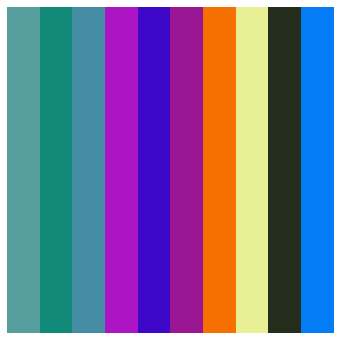

File 2: please allow time for loading
Maximum repetitions was hit
Repetitions: 1000


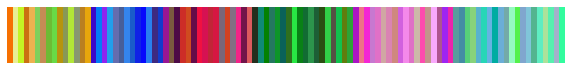

File 3: please allow time for loading
Maximum repetitions was hit
Repetitions: 1000


In [7]:
for i in range(3):
    if i == 0:
        print('File 1: please allow time for loading')
        ncolours, colours = read_data("col10.txt")# read the first file
        main()# run the main method
    if i == 1:
        print('File 2: please allow time for loading')
        ncolours, colours = read_data("col100.txt")# read the second file
        main()# run the main method
    if i == 2:
        print('File 3: please allow time for loading')
        ncolours, colours = read_data("col500.txt")# read the third file
        main()# run the main method

To find the best solution for this method I had set differant maximum repetitions in the main method because the longer the program loops the more correct the solution will be; However when proving the program is working it can take a long time to find the best solution therefore by implementing a max iterations the program can extract the best solution found in that time.